# Sarcasm Detector

## Get and Load Data

In [ ]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
!gdown --id 1ytPDo88FEC2ArOjdqErAiarAZBNJzEJz

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ytPDo88FEC2ArOjdqErAiarAZBNJzEJz
To: /content/SarcasmDetect.json
100% 6.06M/6.06M [00:00<00:00, 13.6MB/s]


In [ ]:
import pandas as pd

df = pd.read_json('./SarcasmDetect.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


## Remove all records with no headline text

In [ ]:
df = df[df['headline'] != '']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [ ]:
df.shape

(28619, 3)

In [ ]:
df['is_sarcastic'].value_counts(normalize=True)

is_sarcastic
0    0.523603
1    0.476397
Name: proportion, dtype: float64

In [ ]:
df = df.drop(columns='article_link')
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


# Basic EDA




In [ ]:
df['len'] = df['headline'].apply(lambda x: len(str(x)))
df.head()

,is_sarcastic,headline,len
0,1,thirtysomething scientists unveil doomsday clo...,61
1,0,dem rep. totally nails why congress is falling...,79
2,0,eat your veggies: 9 deliciously different recipes,49
3,1,inclement weather prevents liar from getting t...,52
4,1,mother comes pretty close to using word 'strea...,61


Max_len of a string in headlines: 926
Min_len of a string in headlines: 7
Average len of a string: 62.30857122890387


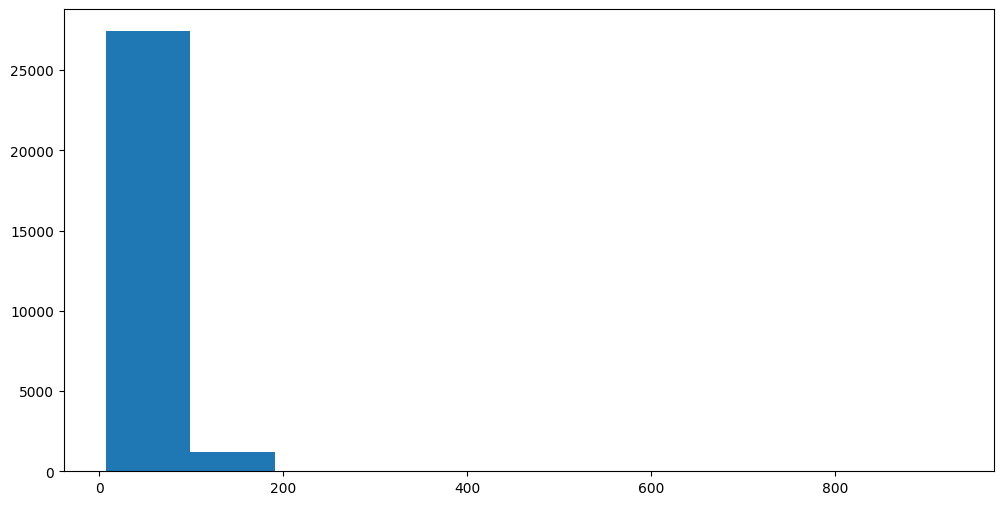

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

train_lens = [s for s in df['len']]

fig, ax = plt.subplots(1,1, figsize=(12, 6))
h1 = ax.hist(train_lens)

print(f'Max_len of a string in headlines: {max(train_lens)}')
print(f'Min_len of a string in headlines: {min(train_lens)}')
print(f'Average len of a string: {np.mean(train_lens)}')

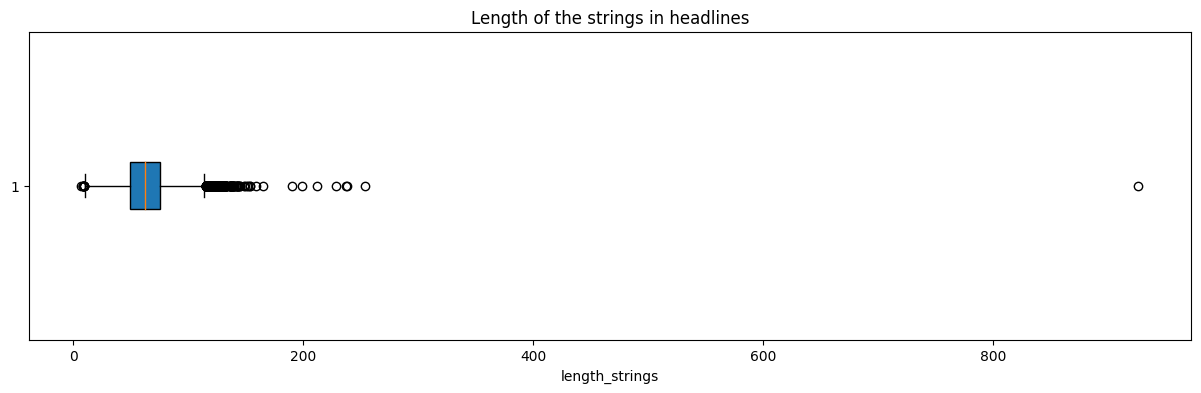

In [ ]:
plt.figure(figsize=(15, 4))  # Adjust figure size as needed
plt.boxplot(train_lens, vert=False, patch_artist=True)  # vert=False for horizontal

# Customize the plot (optional)
plt.xlabel('length_strings')
plt.title('Length of the strings in headlines')


# Customize box appearance (optional)
boxes = plt.gca().get_children()[0]  # Access boxplot elements

plt.show()

In [ ]:
df.sort_values(by='len', ascending=False).head(20)

,is_sarcastic,headline,len
7302,1,hot wheels ranked number one toy for rolling d...,926
2146,1,"maya angelou, poet, author, civil rights activ...",254
16588,1,"'12 years a slave,' 'captain phillips,' 'ameri...",238
24815,1,"elmore leonard, modern prose master, noted for...",237
23598,0,occasionally you realize someone you thought w...,228
26597,1,jared kushner claims that russian interference...,212
27972,1,mia farrow: 'it's possible my son was fathered...,199
4688,1,roy moore on pedophilia accusers: 'these women...,190
25133,1,sessions argues justice department will not be...,165
2426,1,report: doing your part to stop climate change...,159


In [ ]:
df.groupby('is_sarcastic').agg('len').mean()

is_sarcastic
0    59.558625
1    65.331011
Name: len, dtype: float64

In [ ]:
df = df.drop(columns='len')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


# Train Test Split

In [ ]:
 from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_sarcastic']), df['is_sarcastic'], test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20033, 1), (8586, 1), (20033,), (8586,))

In [ ]:
 from collections import Counter
Counter(y_train), Counter(y_test)

(Counter({0: 10530, 1: 9503}), Counter({0: 4455, 1: 4131}))

#Text Pre-Processing
##Text Embeddings: TF IDF

In [ ]:
!pip install contractions
!pip install textsearch
!pip install tqdm
import nltk
nltk.download('punkt')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 16.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import contractions
import re
import tqdm
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from keras.preprocessing import text, sequence

# remove some stopwords to capture negation in n-grams if possible
stopwords = nltk.corpus.stopwords.words('english')
# stopwords.remove('no')
# stopwords.remove('not')
# stopwords.remove('but')

def normalize_document(doc):
    # fix contractions
    doc = contractions.fix(doc)
    # remove special characters and digits
    doc = re.sub(r'[^a-zA-Z\s]', '', doc)
    # lower case
    doc = doc.lower()
    # strip whitespaces
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    #filter stopwords out of document
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

def normalize_corpus(docs):
    norm_docs = []
    for doc in tqdm.tqdm(docs):
        norm_doc = normalize_document(doc)
        norm_docs.append(norm_doc)

    return norm_docs

In [ ]:
df['headline'] = normalize_corpus(df['headline'].values)

100%|██████████| 28619/28619 [00:03<00:00, 8003.42it/s]


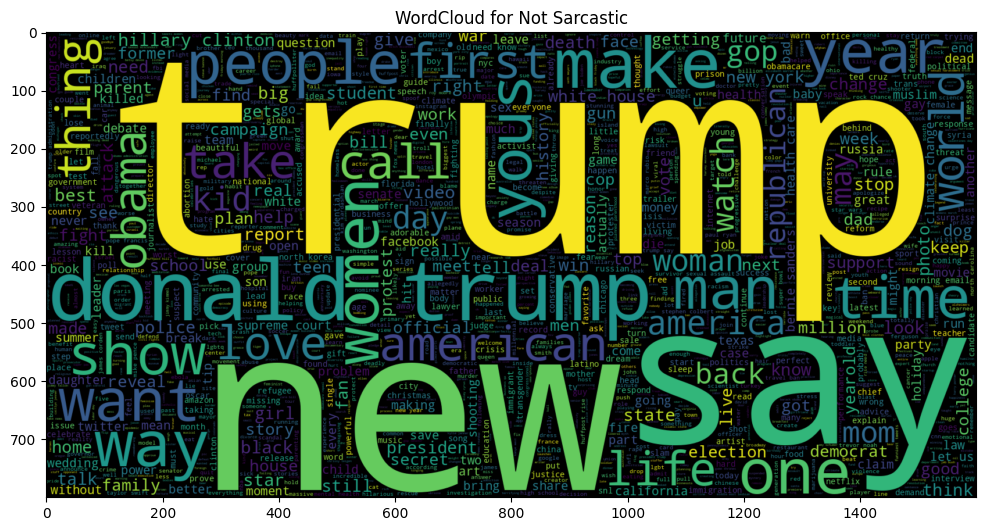

In [ ]:
plt.figure(figsize = (12,10))
plt.title("WordCloud for Not Sarcastic")
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 0].headline))
plt.imshow(wc , interpolation = 'bilinear')

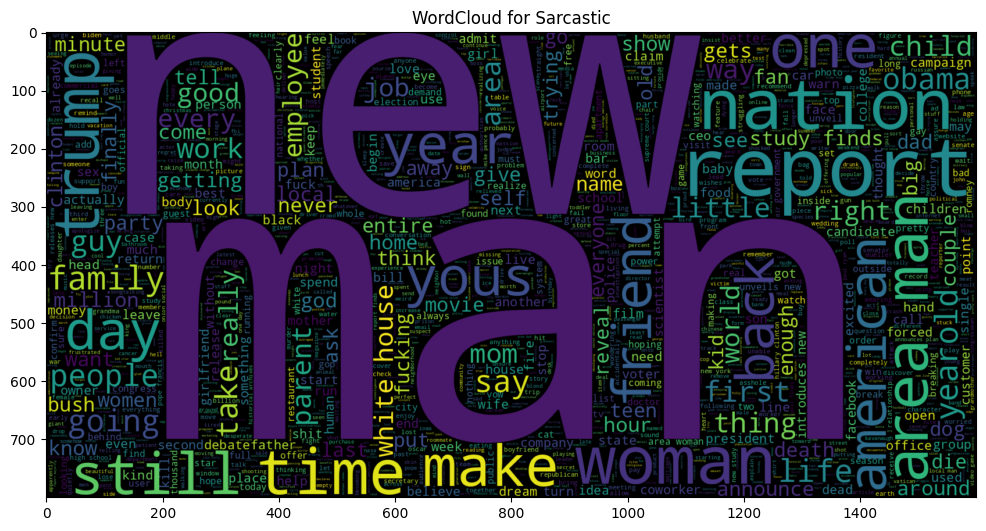

In [ ]:
plt.figure(figsize = (12,10))
plt.title("WordCloud for Sarcastic")
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
X_test['headline']

27927     states slow shut weak teacher education programs
1660             drone places fresh kill steps white house
96       report majority instances people getting lives...
6237     sole remaining lung filled rich satisfying flavor
6650                               gops stockholm syndrome
                               ...                        
3388     nation feels first pang sympathy zuckerberg wa...
3310                   things make high school senior year
25714            winning lottery numbers obvious hindsight
21391    nuns advocates protest planned pipeline erecti...
10018    pilot informs passengers rerouting avoid scary...
Name: headline, Length: 8586, dtype: object

# Logistic Regression

## Base model



In [ ]:
%%time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# build BOW features on train reviews
cv = CountVectorizer(binary=False, min_df=5, max_df=1.0, ngram_range=(1,2))
# min_df=5, max_df=1.0 -> remove words occuring in < 5 documents (very rare words), keep words even if occuring in 100% (all) of docs
# ngram_range=(1,2) -> words and bigrams as features
cv_train_features = cv.fit_transform(X_train['headline'])



# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=5, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(X_train['headline'])

CPU times: user 675 ms, sys: 2.82 ms, total: 678 ms
Wall time: 704 ms


In [ ]:
%%time

# transform test reviews into features
# we use .transform(..) and NOT .fit_transform(..)
# to use vocabulary learnt during training data as our features
cv_test_features = cv.transform(X_test['headline'])


tv_test_features = tv.transform(X_test['headline'])

CPU times: user 201 ms, sys: 937 µs, total: 202 ms
Wall time: 202 ms


In [ ]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)


print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (20033, 6286)  Test features shape: (8586, 6286)
TFIDF model:> Train features shape: (20033, 6286)  Test features shape: (8586, 6286)


In [ ]:
%%time

# Logistic Regression model on BOW features
from sklearn.linear_model import LogisticRegression

# instantiate model
lr = LogisticRegression(penalty='l2', max_iter=500, C=1,
                        solver='sag', random_state=42)

# train model
lr.fit(cv_train_features, y_train)

# predict on test data
lr_bow_predictions = lr.predict(cv_test_features)

CPU times: user 391 ms, sys: 0 ns, total: 391 ms
Wall time: 491 ms


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


print(classification_report(y_test, lr_bow_predictions))
pd.DataFrame(confusion_matrix(y_test, lr_bow_predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      4455
           1       0.80      0.74      0.77      4131

    accuracy                           0.78      8586
   macro avg       0.78      0.78      0.78      8586
weighted avg       0.78      0.78      0.78      8586



,0,1
0,3682,773
1,1091,3040


In [ ]:
%%time

# Logistic Regression model on TF IDF features
from sklearn.linear_model import LogisticRegression

# instantiate model
lr2 = LogisticRegression(penalty='l2', max_iter=1000, C=1,
                        solver='saga', random_state=42)

# train model
lr2.fit(tv_train_features, y_train)

# predict on test data
lr_tf_predictions = lr2.predict(tv_test_features)

CPU times: user 238 ms, sys: 0 ns, total: 238 ms
Wall time: 252 ms


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


print(classification_report(y_test, lr_tf_predictions))
pd.DataFrame(confusion_matrix(y_test, lr_tf_predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      4455
           1       0.80      0.74      0.77      4131

    accuracy                           0.78      8586
   macro avg       0.79      0.78      0.78      8586
weighted avg       0.79      0.78      0.78      8586



,0,1
0,3696,759
1,1094,3037


In [ ]:
# Random Forrest

%%time

# Random Forest model on TF IDF features
from sklearn.ensemble import RandomForestClassifier

# instantiate model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)

# train model
rf.fit(tv_train_features, y_train)

# predict on test data
rf_tf_predictions = rf.predict(tv_test_features)

CPU times: user 44.6 s, sys: 137 ms, total: 44.8 s
Wall time: 45.5 s


In [ ]:
print(classification_report(y_test, rf_tf_predictions))
pd.DataFrame(confusion_matrix(y_test, rf_tf_predictions))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      4455
           1       0.76      0.70      0.73      4131

    accuracy                           0.75      8586
   macro avg       0.75      0.75      0.75      8586
weighted avg       0.75      0.75      0.75      8586



,0,1
0,3515,940
1,1221,2910


## Different Embedding Models

In [ ]:
import gensim
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder

import numpy as np

In [ ]:
# tokenize train reviews
tokenized_train = [nltk.word_tokenize(text)
                       for text in X_train['headline']]
# tokenize test reviews
tokenized_test = [nltk.word_tokenize(text)
                       for text in X_test['headline']]


In [ ]:
%%time
# build word2vec model - takes close to 5-6 mins
w2v_num_features = 300
w2v_model = gensim.models.Word2Vec(X_train['headline'], vector_size=w2v_num_features, window=150,
                                   min_count=10, workers=4, epochs=10)

CPU times: user 9.39 s, sys: 91.5 ms, total: 9.48 s
Wall time: 5.25 s


In [ ]:
def averaged_word2vec_vectorizer(corpus, model, num_features):
    # get the vocabulary of all unique words in your training data
    vocabulary = set(model.wv.index_to_key)

    # function to generate averaged word embeddings for every document (a row in your X)
    def average_word_vectors(words, model, vocabulary, num_features):
        # averaged document embedding vector
        feature_vector = np.zeros((num_features,), dtype="float64")
        nwords = 0. # total number of words in a document

        # for each word in a document
        for word in words:
            # if the word exists in your vocabulary
            if word in vocabulary:
                # total words increases by 1
                nwords = nwords + 1.
                # add \ sum up word embedding for the matched word
                feature_vector = np.add(feature_vector, model.wv[word])
        if nwords:
            # generate averaged document embedding => sum embedding / num of words
            feature_vector = np.divide(feature_vector, nwords)

        return feature_vector

    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [ ]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=w2v_num_features)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=w2v_num_features)

In [ ]:
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)

Word2Vec model:> Train features shape: (20033, 300)  Test features shape: (8586, 300)


In [ ]:
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, input_shape=(num_input_features,)))
    dnn_model.add(Activation('relu'))
    dnn_model.add(Dropout(0.2))

    dnn_model.add(Dense(256))
    dnn_model.add(Activation('relu'))
    dnn_model.add(Dropout(0.2))

    dnn_model.add(Dense(256))
    dnn_model.add(Activation('relu'))
    dnn_model.add(Dropout(0.2))

    dnn_model.add(Dense(1))
    dnn_model.add(Activation('sigmoid'))

    dnn_model.compile(loss='binary_crossentropy', optimizer='adam',
                      metrics=['accuracy'])
    return dnn_model

In [ ]:
w2v_dnn = construct_deepnn_architecture(num_input_features=w2v_num_features)

In [ ]:
w2v_dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               154112    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               6

In [ ]:
batch_size = 100
w2v_dnn.fit(avg_wv_train_features, y_train, epochs=10, batch_size=batch_size,
            shuffle=True, validation_split=0.1, verbose=1)


Epoch 1/10
181/181 [==============================] - 4s 14ms/step - loss: 0.6922 - accuracy: 0.5258 - val_loss: 0.6935 - val_accuracy: 0.5279
Epoch 2/10
181/181 [==============================] - 3s 16ms/step - loss: 0.6924 - accuracy: 0.5257 - val_loss: 0.6915 - val_accuracy: 0.5279
Epoch 3/10
181/181 [==============================] - 2s 12ms/step - loss: 0.6921 - accuracy: 0.5259 - val_loss: 0.6915 - val_accuracy: 0.5274
Epoch 4/10
181/181 [==============================] - 2s 12ms/step - loss: 0.6918 - accuracy: 0.5264 - val_loss: 0.6919 - val_accuracy: 0.5279
Epoch 5/10
181/181 [==============================] - 2s 11ms/step - loss: 0.6919 - accuracy: 0.5258 - val_loss: 0.6915 - val_accuracy: 0.5274
Epoch 6/10
181/181 [==============================] - 2s 12ms/step - loss: 0.6916 - accuracy: 0.5262 - val_loss: 0.6916 - val_accuracy: 0.5279
Epoch 7/10
181/181 [==============================] - 3s 16ms/step - loss: 0.6915 - accuracy: 0.5263 - val_loss: 0.6917 - val_accuracy: 0.5264

In [ ]:
y_pred = w2v_dnn.predict(avg_wv_test_features)
y_pred = y_pred.ravel()

269/269 [==============================] - 1s 3ms/step


In [ ]:
y_pred = [1 if prob > 0.5 else 0 for prob in y_pred]


In [ ]:
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      4455
           1       0.33      0.00      0.00      4131

    accuracy                           0.52      8586
   macro avg       0.43      0.50      0.34      8586
weighted avg       0.43      0.52      0.36      8586



,0,1
0,4441,14
1,4124,7


## Neural Networks
## Pre-Processing for NNs

In [ ]:
import contractions
from bs4 import BeautifulSoup
import numpy as np
import re
import tqdm
import unicodedata

def pre_process_corpus(docs):
  norm_docs = []
  for doc in tqdm.tqdm(docs):
    #doc = strip_html_tags(doc)
    doc = doc.lower()
    doc = contractions.fix(doc)
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z]', '', doc, flags=re.I|re.A)
    doc = re.sub(' +', ' ', doc)
    doc = doc.strip()
    norm_docs.append(doc)

  return norm_docs

In [ ]:


norm_train = pre_process_corpus(X_train['headline'])
norm_test = pre_process_corpus(X_test['headline'])

100%|██████████| 8586/8586 [00:00<00:00, 64981.62it/s]


In [ ]:
import tensorflow as tf

t = tf.keras.preprocessing.text.Tokenizer(oov_token='<UNK>')
# fit the tokenizer on the documents
t.fit_on_texts(norm_train)
t.word_index['<PAD>'] = 0

In [ ]:
max([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]),
min([(k, v) for k, v in t.word_index.items()], key = lambda x:x[1]),
t.word_index['<UNK>']

1

In [ ]:
train_sequences = t.texts_to_sequences(norm_train)
test_sequences = t.texts_to_sequences(norm_test)

In [ ]:
print("Vocabulary size={}".format(len(t.word_index)))
print("Number of Documents={}".format(t.document_count))

Vocabulary size=19962
Number of Documents=20033


In [ ]:
MAX_SEQUENCE_LENGTH = 1000

In [ ]:
# pad dataset to a maximum review length in words
X_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
X_train.shape, X_test.shape

((20033, 1000), (8586, 1000))

In [ ]:
VOCAB_SIZE = len(t.word_index)

EMBEDDING_DIM = 300 # dimension for dense embeddings for each token i.e word embedding size
LSTM_DIM = 128 # the number of hidden units in each LSTM cell i.e the hidden state embedding size;
# total LSTM cells = sequence length (num of tokens) i.e total number of words per document

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=VOCAB_SIZE,
                                    output_dim=EMBEDDING_DIM,
                                    input_length=MAX_SEQUENCE_LENGTH),
                                    )

#model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(LSTM_DIM, return_sequences=False))) # to use bidirectional lstms

model.add(tf.keras.layers.LSTM(LSTM_DIM, return_sequences=False))

model.add(tf.keras.layers.Dense(256, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 300)         5988600   
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 dense (Dense)               (None, 256)               33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 6241529 (23.81 MB)
Trainable params: 6241529 (23.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
batch_size = 128
EPOCHS = 20

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=2,
                                      restore_best_weights=True,
                                      verbose=1)

model.fit(X_train, y_train, epochs=EPOCHS, batch_size=batch_size,
          callbacks=[es],
          shuffle=True, validation_split=0.1, verbose=1)

Epoch 1/20
141/141 [==============================] - 18s 93ms/step - loss: 0.6923 - accuracy: 0.5183 - val_loss: 0.6916 - val_accuracy: 0.5279
Epoch 2/20
141/141 [==============================] - 12s 87ms/step - loss: 0.1610 - accuracy: 0.9224 - val_loss: 1.5258 - val_accuracy: 0.4870
Epoch 3/20
141/141 [==============================] - 12s 88ms/step - loss: 2.4955e-06 - accuracy: 1.0000 - val_loss: 1.7401 - val_accuracy: 0.4696
Epoch 3: early stopping


In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

269/269 [==============================] - 4s 16ms/step - loss: 0.6924 - accuracy: 0.5189
Accuracy: 51.89%


In [ ]:
predict_probas = model.predict(X_test)
predict_probas = predict_probas.ravel()

269/269 [==============================] - 4s 13ms/step


In [ ]:
predictions = [1 if proba > 0.5 else 0 for proba in predict_probas]
predictions[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      4455
           1       0.00      0.00      0.00      4131

    accuracy                           0.52      8586
   macro avg       0.26      0.50      0.34      8586
weighted avg       0.27      0.52      0.35      8586



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1
0,4455,0
1,4131,0


In [ ]:
model3 = tf.keras.models.Sequential()

model3.add(tf.keras.layers.Embedding(input_dim=VOCAB_SIZE,
                                     output_dim=EMBEDDING_DIM,
                                     input_length=MAX_SEQUENCE_LENGTH))

#model2.add(tf.keras.layers.SpatialDropout1D(0.1))

model3.add(tf.keras.layers.GRU(LSTM_DIM, return_sequences=False))

model3.add(tf.keras.layers.Dense(256, activation='relu'))
model3.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model3.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])
model3.summary()

In [ ]:
!nvidia-smi

Thu Apr  4 13:14:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0              28W /  70W |   2315MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install transformers

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip

--2024-04-04 13:16:38--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M-subword.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.102, 108.157.254.121, 108.157.254.124, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5828358084 (5.4G) [application/zip]
Saving to: ‘crawl-300d-2M-subword.zip’

crawl-300d-2M-subwo 100%[===================>]   5.43G  9.01MB/s    in 7m 20s  

2024-04-04 13:23:59 (12.6 MB/s) - ‘crawl-300d-2M-subword.zip’ saved [5828358084/5828358084]



In [ ]:
!unzip crawl-300d-2M-subword.zip

Archive:  crawl-300d-2M-subword.zip
  inflating: crawl-300d-2M-subword.vec  
  inflating: crawl-300d-2M-subword.bin  


In [ ]:
VOCAB_SIZE = len(t.word_index)
EMBED_SIZE = 300
EPOCHS=100
BATCH_SIZE=32

In [ ]:
word2idx = t.word_index
FASTTEXT_INIT_EMBEDDINGS_FILE = './crawl-300d-2M-subword.vec'


def load_pretrained_embeddings(word_to_index, max_features, embedding_size, embedding_file_path):

    def get_coefs(word,*arr):
        return word, np.asarray(arr, dtype='float32')

    embeddings_index = dict(get_coefs(*row.split(" "))
                                for row in open(embedding_file_path, encoding="utf8", errors='ignore')
                                    if len(row)>100)

    all_embs = np.stack(list(embeddings_index.values()))
    emb_mean, emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]

    nb_words = min(max_features, len(word_to_index))
    embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embedding_size))

    for word, idx in word_to_index.items():
        if idx >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[idx] = embedding_vector

    return embedding_matrix

In [ ]:
ft_embeddings = load_pretrained_embeddings(word_to_index=word2idx,
                                           max_features=VOCAB_SIZE,
                                           embedding_size=EMBED_SIZE,
                                           embedding_file_path=FASTTEXT_INIT_EMBEDDINGS_FILE)
ft_embeddings.shape

(19962, 300)

In [ ]:
# create the model
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(VOCAB_SIZE, EMBED_SIZE,
                                    weights=[ft_embeddings],
                                    trainable=True,
                                    input_length=MAX_SEQUENCE_LENGTH))

model.add(tf.keras.layers.Conv1D(filters=256, kernel_size=4, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 300)         5988600   
                                                                 
 conv1d (Conv1D)             (None, 1000, 256)         307456    
                                                                 
 max_pooling1d (MaxPooling1  (None, 500, 256)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 128)          131200    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 250, 128)          0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 250, 64)          

In [ ]:
# Fit the model:
# if you want to use early stopping
# use the following as a callback:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=2,
                                      restore_best_weights=True,
                                      verbose=1)

model.fit(X_train, y_train,
          epochs=5,
          batch_size=BATCH_SIZE,
          shuffle=True,
          verbose=1)

Epoch 1/5
627/627 [==============================] - 22s 35ms/step - loss: 0.6924 - accuracy: 0.5253
Epoch 2/5
627/627 [==============================] - 23s 36ms/step - loss: 0.6621 - accuracy: 0.5867
Epoch 3/5
627/627 [==============================] - 21s 33ms/step - loss: 0.1295 - accuracy: 0.9352
Epoch 4/5
627/627 [==============================] - 20s 32ms/step - loss: 0.0034 - accuracy: 0.9997
Epoch 5/5
627/627 [==============================] - 21s 33ms/step - loss: 1.2468e-05 - accuracy: 1.0000


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

predictions = model.predict(X_test, batch_size=300, verbose=0).ravel()
predictions = [1 if prob > 0.5 else 0 for prob in predictions]
print("Accuracy: %.2f%%" % (accuracy_score(y_test, predictions)*100))
print(classification_report(y_test, predictions))
pd.DataFrame(confusion_matrix(y_test, predictions))

Accuracy: 48.35%
              precision    recall  f1-score   support

           0       1.00      0.00      0.01      4455
           1       0.48      1.00      0.65      4131

    accuracy                           0.48      8586
   macro avg       0.74      0.50      0.33      8586
weighted avg       0.75      0.48      0.32      8586



,0,1
0,20,4435
1,0,4131
